<a href="https://colab.research.google.com/github/Radhika02005/Linear-Regression-Analysis-in-R/blob/main/Linear_Regression_Analysis_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("broom")
library(broom)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [4]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
ads = read.csv("/content/Dummy Data HSS.csv")

In [6]:
head(ads)

,TV,Radio,Social.Media,Influencer,Sales
,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,16,6.566231,2.907983,Mega,54.73276
2,13,9.237765,2.409567,Mega,46.67790
3,41,15.886446,2.913410,Mega,150.17783
4,83,30.020028,6.922304,Mega,298.24634
5,15,8.437408,1.405998,Micro,56.59418
6,29,9.614382,1.027163,Mega,105.88915


In [7]:
dim(ads)

[1] 4572    5

In [8]:
summary(ads)

       TV             Radio            Social.Media        Influencer       
 Min.   : 10.00   Min.   : 0.000684   Min.   :3.130e-05   Length:4572       
 1st Qu.: 32.00   1st Qu.:10.525957   1st Qu.:1.528e+00   Class :character  
 Median : 53.00   Median :17.859513   Median :3.056e+00   Mode  :character  
 Mean   : 54.07   Mean   :18.160356   Mean   :3.324e+00                     
 3rd Qu.: 77.00   3rd Qu.:25.649730   3rd Qu.:4.808e+00                     
 Max.   :100.00   Max.   :48.871161   Max.   :1.398e+01                     
 NA's   :10       NA's   :4           NA's   :6                             
     Sales      
 Min.   : 31.2  
 1st Qu.:112.3  
 Median :189.2  
 Mean   :192.5  
 3rd Qu.:272.5  
 Max.   :364.1  
 NA's   :6      

In [13]:
str(ads)

'data.frame':	4572 obs. of  5 variables:
 $ TV          : int  16 13 41 83 15 29 55 31 76 13 ...
 $ Radio       : num  6.57 9.24 15.89 30.02 8.44 ...
 $ Social.Media: num  2.91 2.41 2.91 6.92 1.41 ...
 $ Influencer  : chr  "Mega" "Mega" "Mega" "Mega" ...
 $ Sales       : num  54.7 46.7 150.2 298.2 56.6 ...


In [14]:
sum(is.na(ads$Sales))
sum(is.na(ads$Influencer))

[1] 6

[1] 0

In [15]:
ads_clean <- na.omit(ads)

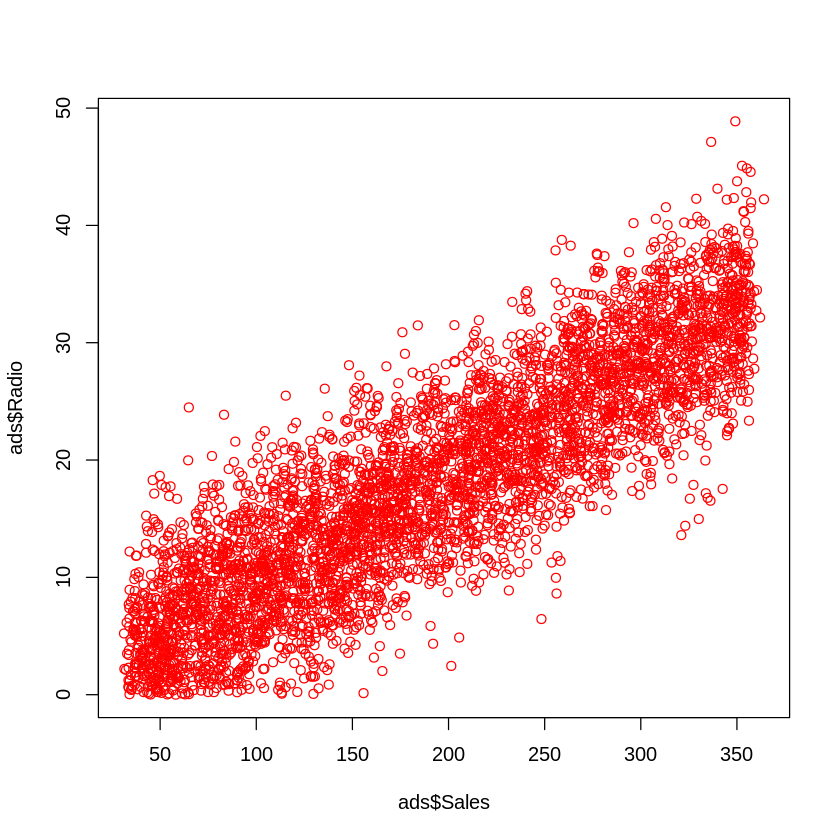

In [18]:
#data visualization
plot(ads$Sales,ads$Radio, type = 'p', col = "red")

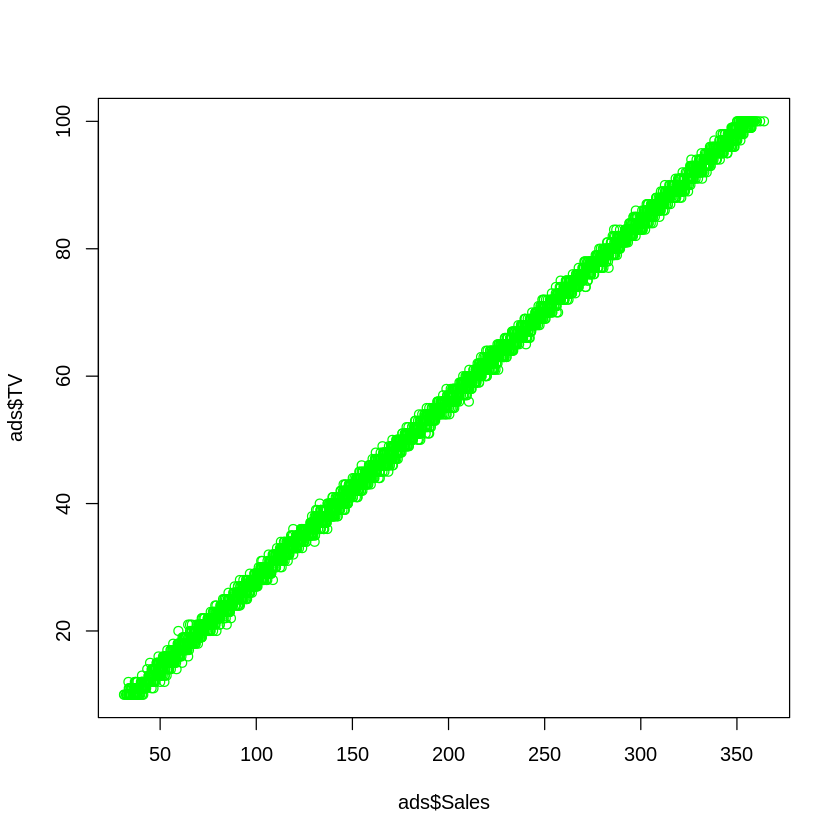

In [20]:
plot(ads$Sales,ads$TV, type = 'p', col = "green")

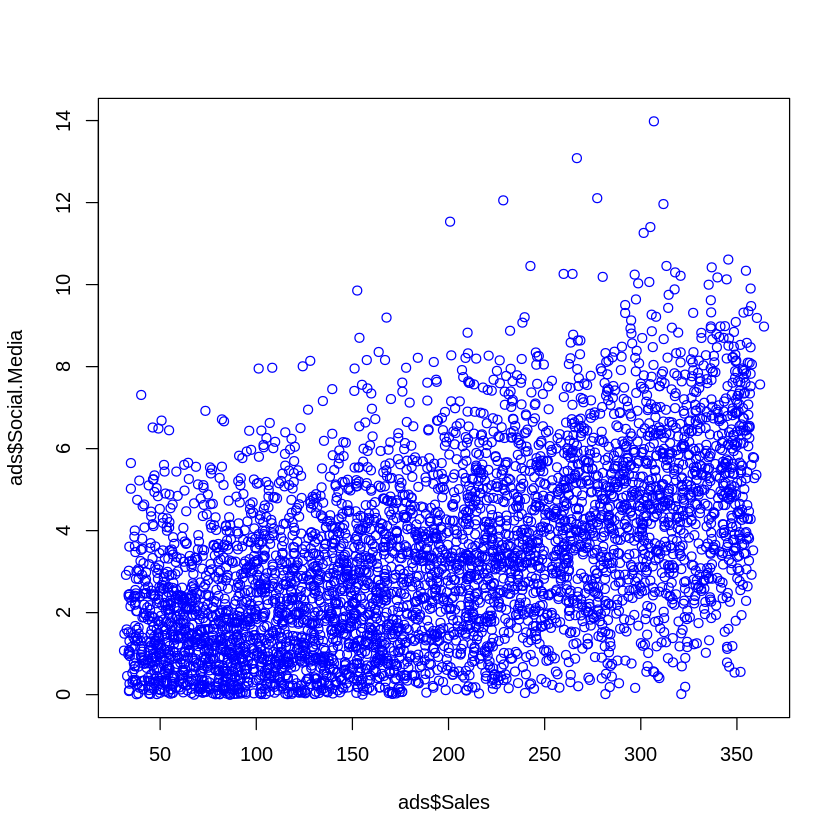

In [26]:
plot(ads$Sales,ads$Social.Media, type = 'p', col = "blue")

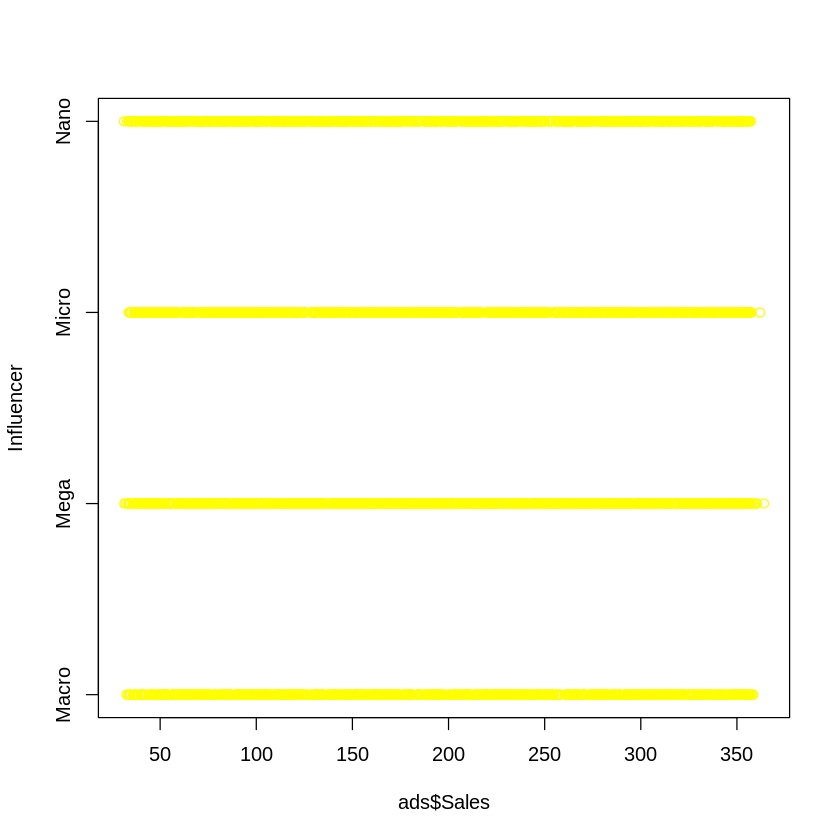

In [32]:
#Convert ads$Influencer to a factor, then to numeric positions

ads$Influencer <- as.factor(ads$Influencer)
plot(ads$Sales, as.numeric(ads$Influencer), type = 'p', col = "yellow",
     yaxt = "n", ylab = "Influencer")
axis(2, at = 1:length(levels(ads$Influencer)), labels = levels(ads$Influencer))

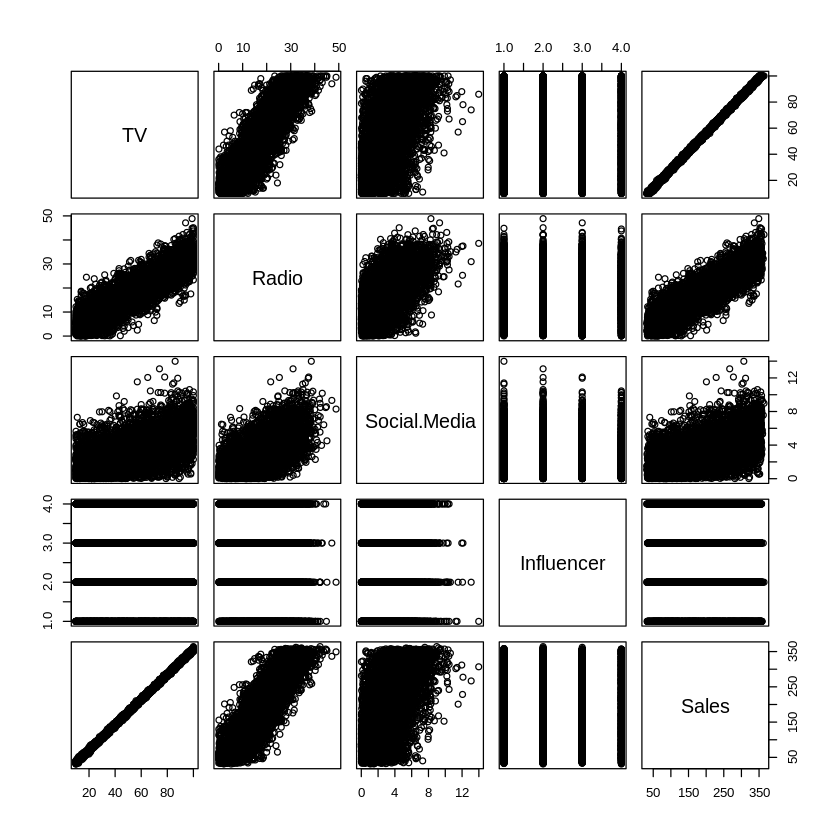

In [33]:
pairs(ads)

In [34]:
#correlation Analysis
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



In [35]:
num.cols = sapply(ads,is.numeric)

In [36]:
num.cols

TV        Radio Social.Media   Influencer        Sales 
        TRUE         TRUE         TRUE        FALSE         TRUE

In [39]:
cor(ads[sapply(ads, is.numeric)], use = "complete.obs")
cor.data

,TV,Radio,Social.Media,Sales
TV,1.0000000,0.8691581,0.5276874,0.9994974
Radio,0.8691581,1.0000000,0.6063383,0.8686378
Social.Media,0.5276874,0.6063383,1.0000000,0.5274464
Sales,0.9994974,0.8686378,0.5274464,1.0000000


,TV,Radio,Social.Media,Sales
TV,1,NA,NA,NA
Radio,NA,1,NA,NA
Social.Media,NA,NA,1,NA
Sales,NA,NA,NA,1


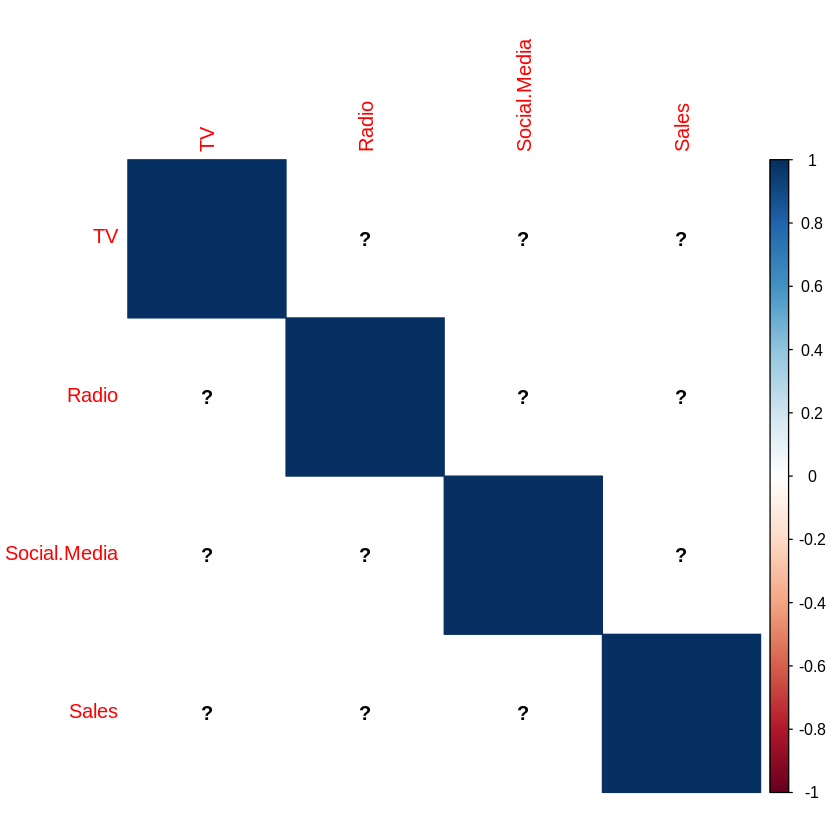

In [40]:
corrplot(cor.data, method = "color")

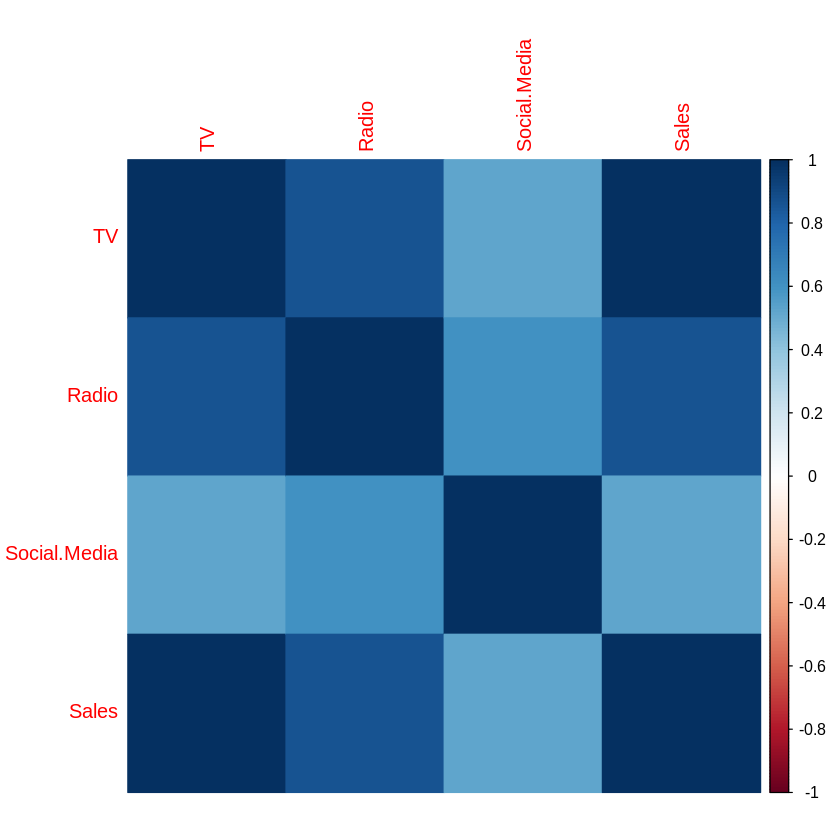

In [41]:
corrplot(cor(ads[sapply(ads, is.numeric)], use = "complete.obs")
, method = "color")

In [44]:
#simple linear regression
model_simple = lm(Sales~TV, data = ads)
summary(model_simple)


Call:
lm(formula = Sales ~ TV, data = ads)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6103  -2.0095  -0.0121   2.0270  11.2562 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.126325   0.100500   -1.257    0.209    
TV           3.561411   0.001674 2127.776   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.95 on 4554 degrees of freedom
  (16 observations deleted due to missingness)
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 4.527e+06 on 1 and 4554 DF,  p-value: < 2.2e-16


In [45]:
tidy(model_simple)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.1263254,0.100500164,-1.256967,0.20883
TV,3.5614111,0.001673771,2127.776216,0.00000


In [47]:
#multiple linear regression model

model_multiple = lm(Sales~TV + Social.Media + Radio , data = ads )
summary(model_multiple)


Call:
lm(formula = Sales ~ TV + Social.Media + Radio, data = ads)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6158  -2.0002  -0.0075   2.0199  11.2581 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  -0.133963   0.102820   -1.303    0.193    
TV            3.562570   0.003389 1051.118   <2e-16 ***
Social.Media  0.004964   0.024884    0.199    0.842    
Radio        -0.003970   0.009781   -0.406    0.685    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.95 on 4542 degrees of freedom
  (26 observations deleted due to missingness)
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 1.505e+06 on 3 and 4542 DF,  p-value: < 2.2e-16


In [48]:
tidy(model_multiple)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.133963052,0.102820346,-1.3028847,0.1926802
TV,3.562569627,0.003389316,1051.1176661,0.0000000
Social.Media,0.004964018,0.024883556,0.1994899,0.8418885
Radio,-0.003970387,0.009780544,-0.4059474,0.6848004


In [50]:
coef = summary (model_multiple)$coefficients
coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.133963052,0.102820346,-1.3028847,0.1926802
TV,3.562569627,0.003389316,1051.1176661,0.0000000
Social.Media,0.004964018,0.024883556,0.1994899,0.8418885
Radio,-0.003970387,0.009780544,-0.4059474,0.6848004


In [52]:
#test and train data
set.seed(101)

In [54]:
sample= sample.split (ads$TV , SplitRatio = 0.70)
train = subset(ads , sample == TRUE)

In [55]:
test = subset(ads , sample == FALSE)

In [56]:
model = lm(Sales~ . , train)
summary(model)


Call:
lm(formula = Sales ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5214  -1.9604  -0.0055   2.0268  11.2101 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.114020   0.154607  -0.737    0.461    
TV               3.560962   0.004010 887.949   <2e-16 ***
Radio           -0.000775   0.011526  -0.067    0.946    
Social.Media     0.024433   0.029451   0.830    0.407    
InfluencerMega  -0.045834   0.148130  -0.309    0.757    
InfluencerMicro -0.107921   0.146507  -0.737    0.461    
InfluencerNano  -0.111467   0.147491  -0.756    0.450    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.913 on 3171 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 5.386e+05 on 6 and 3171 DF,  p-value: < 2.2e-16


In [57]:
tidy(model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.1140196073,0.154607081,-0.7374799,0.4608852
TV,3.5609616126,0.004010321,887.9492425,0.0000000
Radio,-0.0007749572,0.011526132,-0.0672348,0.9463990
Social.Media,0.0244330181,0.029450795,0.8296217,0.4068152
InfluencerMega,-0.0458344347,0.148130280,-0.3094198,0.7570226
InfluencerMicro,-0.1079207272,0.146507335,-0.7366234,0.4614059
InfluencerNano,-0.1114672268,0.147491127,-0.7557555,0.4498520


In [59]:
res = residuals(model)
res = as.data.frame(res)
res

,res
,<dbl>
1,-2.1487369
2,0.4935359
3,4.2793846
4,2.7005115
5,3.3738828
6,2.7634689
7,2.9637511
8,-1.4728899
10,2.0937979


In [60]:
sales.predictions= predict(model, test)
sales.predictions

9        14        19        22        27        29        42        43 
270.67417        NA 356.04393 277.68263        NA  74.68781 292.00051 241.98544 
       47        49        50        56        61        63        70        74 
       NA 103.14802 113.84470  35.44364 242.11133 185.06136  53.27917 288.38655 
       76        82        84        85        87        90        93        94 
       NA  78.22882 128.12102  42.60231 345.24776 331.06332 103.20917 256.22617 
       95        98       100       102       108       110       113       116 
 49.72764 174.33554        NA 309.63335 224.17532 334.70412  63.92635 142.39173 
      117       120       125       126       127       129       131       142 
263.31666        NA 135.23487 106.80027 174.37317 106.70584  74.74844        NA 
      149       151       153       158       161       163       164       167 
152.97335 298.97843  85.27000 156.50017 113.74103 138.78108        NA 174.36541 
      168       169       176       177       182       184       185       189 
277.69969 174.41764 245.66702 334.66176 352.58066        NA        NA 277.68100 
      191       198       205       210       211       212       213       216 
156.59541        NA 270.59961 131.54329        NA 327.52764 356.08715  96.00176 
      229       231       232       237       248       250       252       254 
277.67151 160.04022  78.22214  95.97800 209.93747 213.62714 103.11815  39.08178 
      256       261       263       266       267       270       271       273 
135.15401 249.15758 167.14240 224.29130 234.86346 267.03031 302.58254 320.46050 
      276       280       284       285       286       302       303       304 
316.77808  81.74851  46.13869 295.42927 235.10955  49.64350  85.37671 231.46516 
      306       308       309       319       325       330       333       335 
306.19840 209.89896 313.22147 267.01560 120.99472 284.75403 178.02727 306.21879 
      338       341       342       343       352       353       355       356 
185.09919 331.07547 302.58544  74.67876 106.72794 306.23652  56.89431 224.21266 
      359       365       367       374       375       379       381       386 
120.86705 163.68043 138.78261 195.69753 299.08232 327.60846 149.62130 295.49395 
      389       391       399       401       402       403       405       408 
288.45766  85.24325  42.66473 252.75821 106.63766 341.81199 217.07467 113.96984 
      409       410       416       417       418       421       423       425 
 81.78472  67.56957 149.40219  99.51011 299.14746 224.10782 181.54296 348.83746 
      432       433       434       437       441       444       455       458 
174.40052 181.59363 174.49559  74.65060 259.87480 348.89931  74.66452 153.15305 
      462       465       468       470       473       475       476       477 
220.65788 117.36413 281.24899 153.01473  60.47437  56.91444 241.98674 320.51706 
      479       481       483       489       490       494       495       499 
113.78429 327.40478  85.30819 242.07562  71.04396  78.29970  85.35927 156.47123 
      502       503       505       507       511       515       516       518 
 74.72919 220.64753 302.81838  88.87545 192.19026 245.64280 195.74364 142.29835 
      519       521       523       524       527       528       529       530 
170.89510 352.46635 174.47080 263.51337 217.06641  46.09642 160.02892 177.84053 
      531       532       534       537       538       541       547       551 
117.48952  42.65379 213.52397 206.41061 185.04834 249.22866 259.85271 110.22544 
      553       554       556       557       559       564       570       571 
345.32741 341.73456 267.04547  99.53999 338.28460 249.21177 348.76653 252.78965 
      580       582       584       587       590       593       598       603 
 46.12476 167.25499 135.20101 334.56436 345.32947 331.05639  71.07729 277.67296 
      604       606       608       612       615       616       617       620 
259.95113 345.36489  85.32054 124.50241

In [61]:
results = cbind(sales.predictions, test$Sales)
results

,sales.predictions,
9,270.67417,270.18940
14,NA,276.16535
19,356.04393,353.80464
22,277.68263,276.40134
27,NA,342.91337
29,74.68781,76.99293
42,292.00051,294.95242
43,241.98544,242.82488
47,NA,318.96978
49,103.14802,101.87310


In [64]:
colnames(results) = c("predictions","real")
results = as.data.frame(results)
results

,predictions,real
,<dbl>,<dbl>
9,270.67417,270.18940
14,NA,276.16535
19,356.04393,353.80464
22,277.68263,276.40134
27,NA,342.91337
29,74.68781,76.99293
42,292.00051,294.95242
43,241.98544,242.82488
47,NA,318.96978


In [68]:
sum(is.na(test$Sales))

[1] 2

In [72]:
# Calculate RMSE and MAE
rmse <- sqrt(mean((predictions_clean - actuals_clean)^2))
mae <- mean(abs(predictions_clean - actuals_clean))

cat("RMSE:", rmse, "\n")
cat("MAE:", mae, "\n")


RMSE: 3.036507 
MAE: 2.431532 


In [73]:
# Avoid dividing by zero
actuals_clean <- ifelse(actuals_clean == 0, 0.0001, actuals_clean)

# Mean Absolute Percentage Error
mape <- mean(abs((predictions_clean - actuals_clean) / actuals_clean)) * 100

# Accuracy
accuracy <- 100 - mape

cat("MAPE:", mape, "%\n")
cat("Regression Accuracy:", accuracy, "%\n")


MAPE: 1.800156 %
Regression Accuracy: 98.19984 %
